In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
DF = pd.read_csv("data2.tsv", delimiter="\s+", header=None)

In [108]:
Y = DF[1].values  
time = DF[0].values
n = Y.size

In [109]:
def F(t, a0, a1, b0,b1):
    return (a0 + a1 * t) / (b0 + b1 * t)

In [110]:
def gradients(t_values, y_values, a0, a1, b0,b1):
    predictions = F(t_values, a0, a1, b0,b1)
    errors = predictions - y_values
    
    grad_a0 = 0.0
    grad_a1 = 0.0
    grad_b0 = 0.0
    grad_b1 = 0.0
    
    for i in range(len(t_values)):
        t_i = t_values[i]
        error_i = errors[i]
        grad_a0 += 2 * error_i / (b0 + t_i)
        grad_a1 += 2 * error_i * t_i / (b0 + t_i)
        grad_b0 -= 2 * error_i * (a0 + a1 * t_i) / (b0 + t_i)**2
        grad_b1 -= error_i * t_i * (a0 + a1 * t_i) / (b0 + t_i)**2
    
    return grad_a0, grad_a1, grad_b0, grad_b1

In [111]:
a0,a1,b0,b1 = 1,1,1,1

lr = 0.000001

In [112]:
for i in range(10000):

    ga0,ga1,gb0,gb1 = gradients(time,Y,a0,a1,b0,b1)
    a0 = a0 - ga0 * lr
    a1 = a1 - ga1 * lr
    b0 = b0 - gb0 * lr
    b1 = b1 - gb1 * lr


In [113]:
predictions = F(time, a0, a1, b0,b1)

In [114]:
a0,a1,b0,b1

(1.6872389737462963,
 2.263578615921887,
 0.7078105369926868,
 -0.3675566621957085)

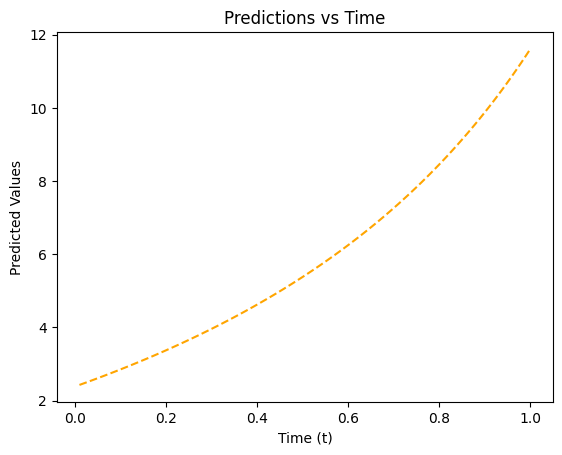

In [122]:
plt.plot(time, predictions, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Time")
plt.show()

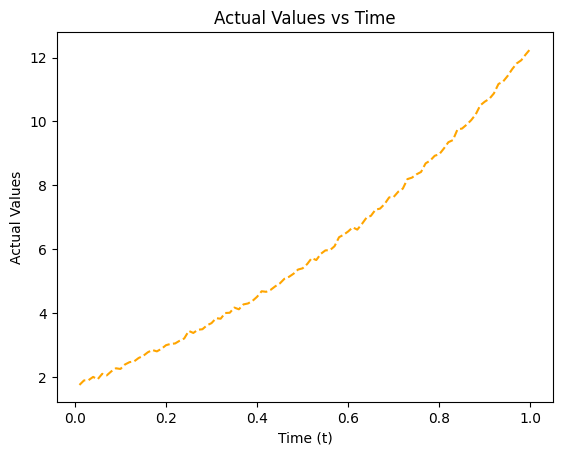

In [123]:
plt.plot(time, Y, linestyle='--', color='orange', markersize=8)
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values vs Time")
plt.show()

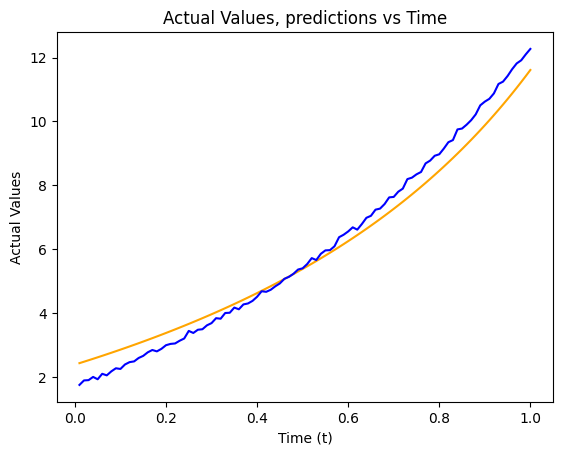

In [ ]:
plt.plot(time, predictions, label='y_pred', color='orange')
plt.plot(time, Y, label='y_true', color='blue')
plt.xlabel("Time (t)")
plt.ylabel("Actual Values")
plt.title("Actual Values, predictions vs Time")
plt.show()

In [118]:
errors = Y - predictions

<function matplotlib.pyplot.show(close=None, block=None)>

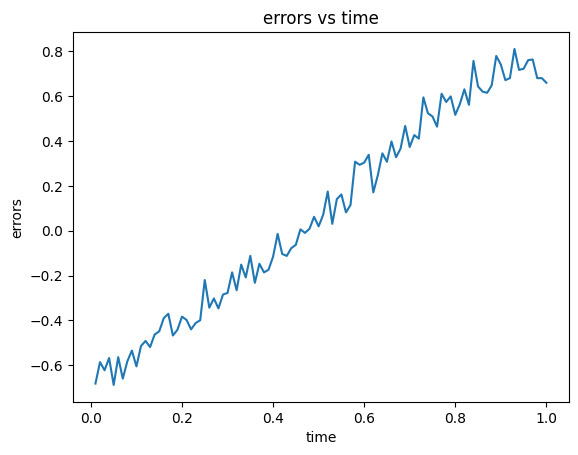

In [127]:
plt.plot(time,errors)
plt.xlabel('time')
plt.ylabel('errors')
plt.title('errors vs time')
plt.show

In [139]:
least_squared_error = np.sum(errors*errors)
least_squared_error

21.198341135704933